# Data Trimming

Measured data sets often contain unnecessary or undesirable values. Therefore, it is good practice to pre-process data sets so that they contain only well-conditioned data for analysis. We call this process "trimming."

## Learning Points

In this chapter, you will learn about:

* ssd.plot_trimming_info()
* ssd.plot_compact()
* Moment
* ssd.trimmed_copy()

## Overview of the Data

The data set used here for explanation looks like this.

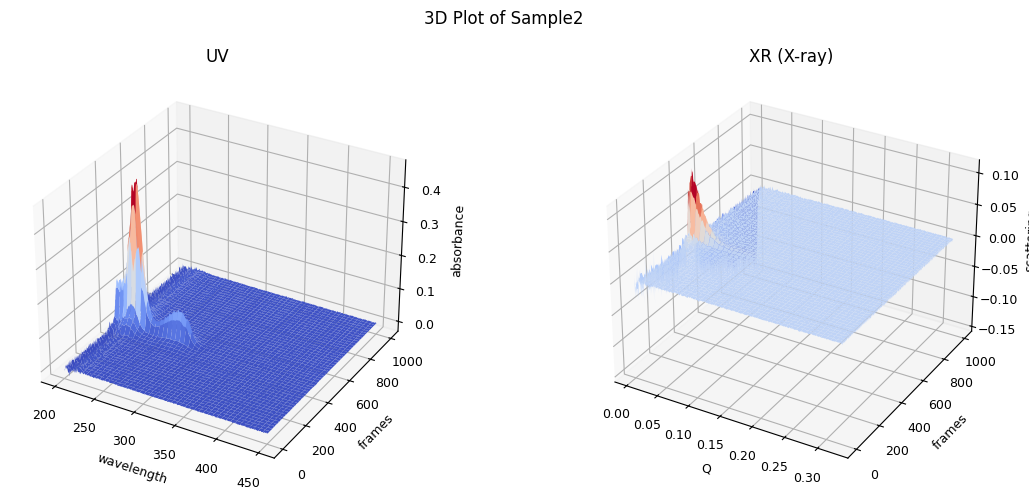

In [9]:
from molass import get_version
assert get_version() >= '0.2.0', "This tutorial requires molass version 0.2.0 or higher."
from molass_data import SAMPLE2
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE2)
ssd.plot_3d(title="3D Plot of Sample2");

## Plotting Trimming Ranges

You can plot the default trimming ranges as follows.

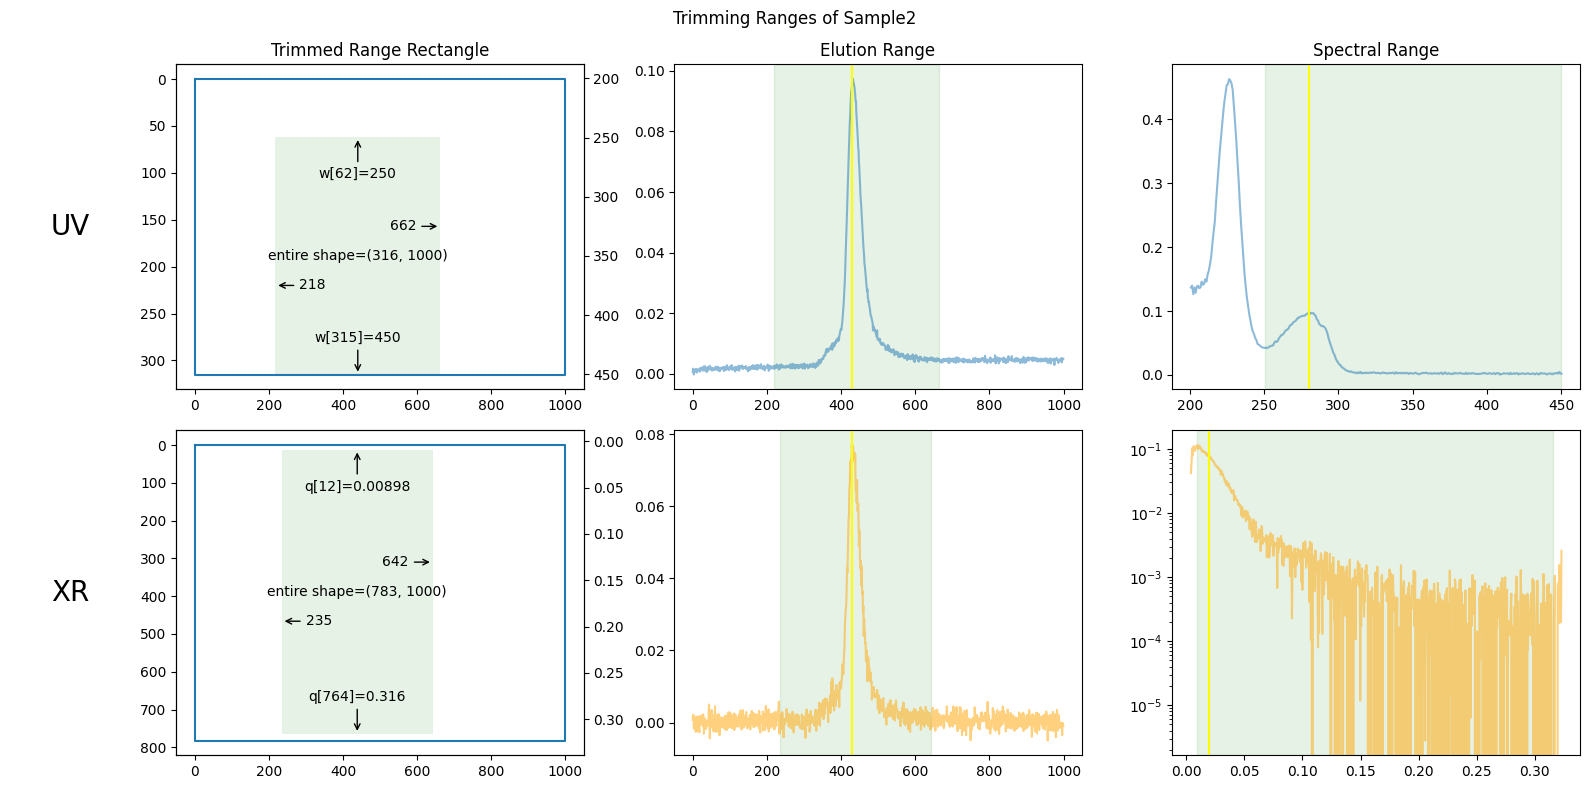

In [10]:
ssd.plot_trimming(title="Trimming Ranges of Sample2");

The figures above show the trimming ranges in three distinct ways: on the left, as rectangles suggesting rows and columns in matrices; in the center, as vertical bands on elution curves; and on the right, as vertical bands on spectral curves (such as absorbance or scattering curves).

The elution range has been chosen to focus on the peak region, including enough baseline regions to be useful but excluding unnecessary portions. How to choose this range will be explained in the next section.

The wavelength range below 250 nm in UV absorbance has been cut off due to unstable measurements often observed in that region.

Both ends of the X-ray scattering angle range have been cut off due to irregular values.

The center figures also show baselines as red lines, which will be explained in the following chapters.

More compact plots are available below.

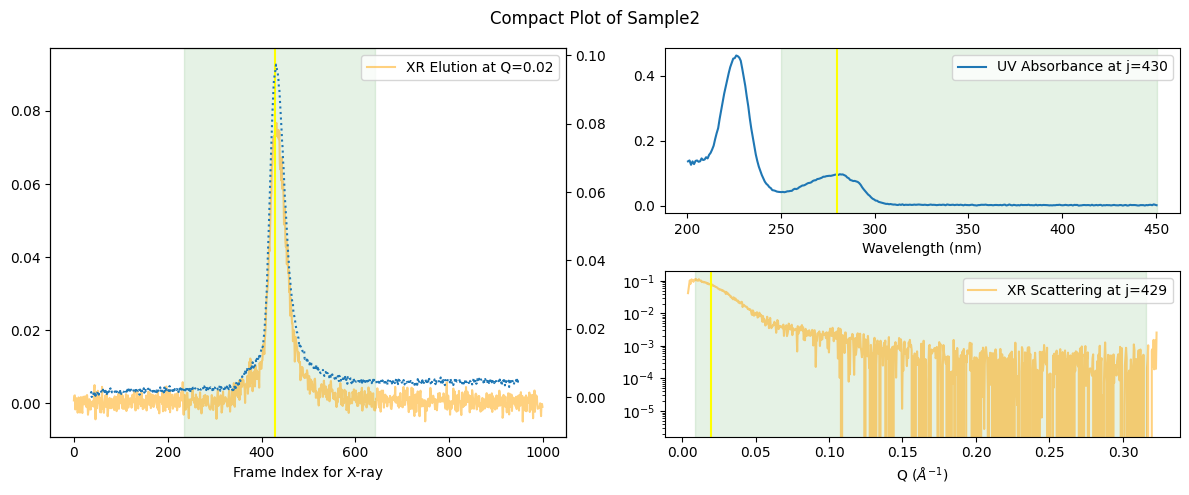

In [11]:
ssd.plot_compact(title="Compact Plot of Sample2");


In this compact form, the mapping between UV and X-ray elution points becomes more apparent. How this "mapping" is determined is explained a separate book [Molass Technical Report](https://freesemt.github.io/molass-technical/).

## Trimmed Copy

If these trimming ranges look appropriate, we can make a trimmed copy of the SSD object and use it for desired analysis.

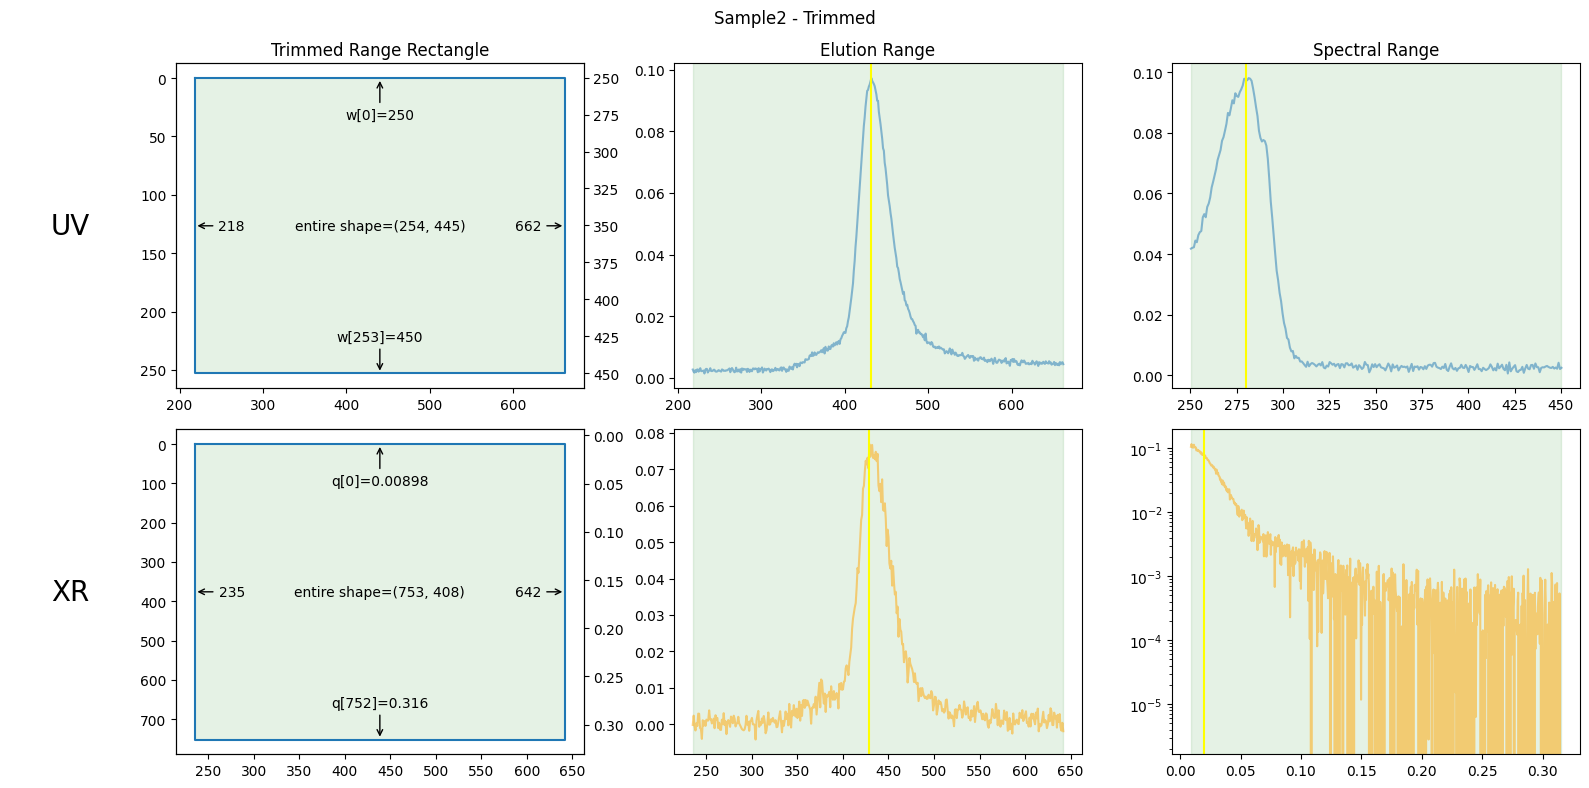

In [12]:
trimmed_ssd = ssd.trimmed_copy()
trimmed_ssd.plot_trimming(title="Sample2 - Trimmed");

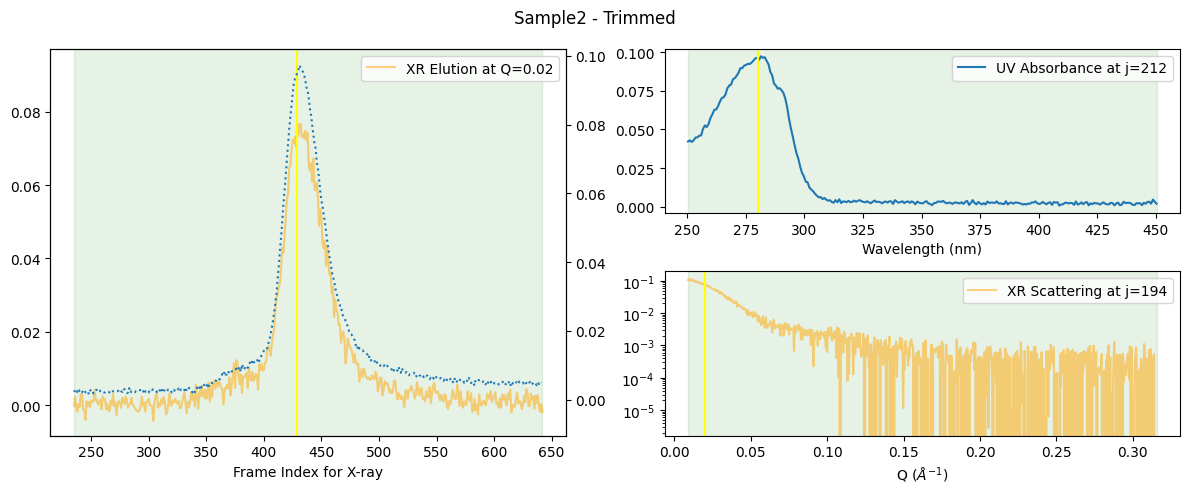

In [13]:
trimmed_ssd.plot_compact(title="Sample2 - Trimmed");

## How to Manually Trim

How the default trimming ranges are chosen is explained in a separate book [Molass Technical Report](https://freesemt.github.io/molass-technical/).

What if the default ranges do not seem appropriate? Then, you have to trim manually. Here is how you can do it.

First, print the default trimming info.

In [14]:
trimming = ssd.make_trimming()
print("Trimming:", trimming)

Trimming: TrimmingInfo(xr_slices=(slice(12, 765), slice(235, 643)), uv_slices=(slice(62, None), slice(218, 663)), mapping=MappingInfo(slope=1.09, intercept=-39.1, xr_peaks=..., uv_peaks=..., xr_moment=..., uv_moment=...))


Then, using and modifying the printed slices, make a new TrimmingInfo object as follows. 

In [15]:
manually_trimmed_ssd = ssd.copy(xr_slices=(slice(12, 765), slice(235-100, 643+100)),
                        uv_slices=(slice(62, None), slice(218-100, 668+100)),
                        trimmed=False  # to plot the original trimming ranges in the next plot 
                        )

In this example, the renewed elution range gets slightly (100 points to each side) wider as shown below.

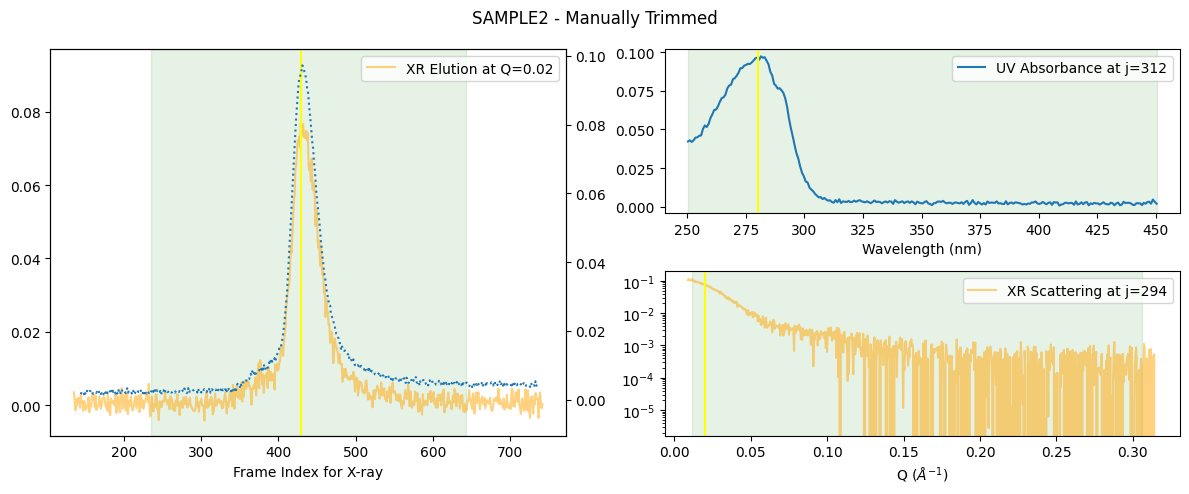

In [16]:
manually_trimmed_ssd.plot_compact(title="SAMPLE2 - Manually Trimmed");